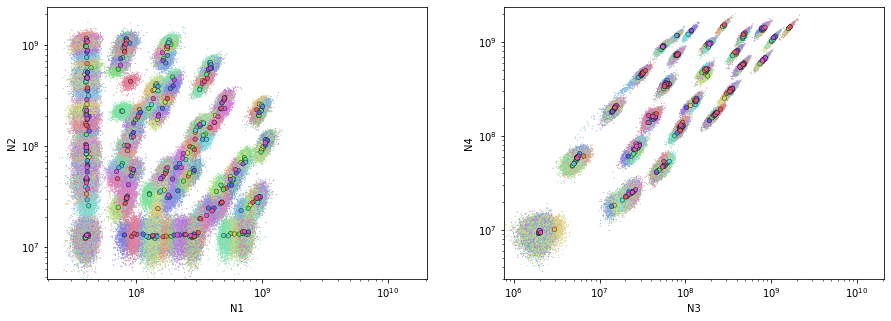

In [5]:
import pandas as pd
from datetime import datetime

current_date = datetime.now()
formatted_date = current_date.strftime("%Y.%m.%d")

root = '/Users/grantongo/Desktop/nature methods'
figure_directory = '/Users/grantongo/Desktop/nature methods/figures'

df_bc = pd.read_csv(f'{root}/data/barcodes/individual_beads_n1-n4_and_barcode_ID.csv',header=None)
df_pr = pd.read_csv(f'{root}/data/barcodes/predicted_with_FRET_n1-n4_and_barcode_ID.csv', header=None)

df_bc.columns = ['N1','N2','N3','N4','Barcode']
df_pr.columns = ['N1','N2','N3','N4','Barcode']

df_ = df_bc.sample(frac=0.20, random_state=42)
df_ = df_.reset_index(drop=True)

fig, ax = plt.subplots(1,2,figsize=(15,5), gridspec_kw={'wspace':0.2, 'hspace':0.4})
ax = ax.ravel()

legend=False
rasterized=True
s=1
palette=sbn.color_palette("hls", 384)

ax[0] = sbn.scatterplot(data=df_,
                        x='N1', 
                        y='N2',
                        hue='Barcode',
                        palette=palette,
                        s=s,
                        legend=legend,
                        rasterized=rasterized,
                        ax=ax[0])
ax[0] = sbn.scatterplot(data=df_pr,
                        x='N1', 
                        y='N2',
                        hue='Barcode',
                        palette=palette,
                        s=20*s,
                        edgecolor='black',
                        legend=legend,
                        ax=ax[0])
ax[1] = sbn.scatterplot(data=df_,
                        x='N3', 
                        y='N4',
                        hue='Barcode',
                        palette=palette,
                        s=s,
                        legend=legend,
                        rasterized=rasterized,
                        ax=ax[1])
ax[1] = sbn.scatterplot(data=df_pr,
                        x='N3', 
                        y='N4',
                        hue='Barcode',
                        palette=palette,
                        s=20*s,
                        edgecolor='black',
                        legend=legend,
                        ax=ax[1])
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xscale('log')

ax[0].set_xlim(11**7,14**9)
ax[0].set_ylim(13**6,11**9)
ax[1].set_xlim(15**5,14**9)
ax[1].set_ylim(12**6,11**9)

fig.savefig(f'{figure_directory}/figure 2/figure.2_barcodes_{formatted_date}.png',bbox_inches='tight',dpi=400)
fig.savefig(f'{figure_directory}/figure 2/figure.2_barcodes_{formatted_date}.svg',bbox_inches='tight',dpi=400)